# pynbn Documentation

*pynbn* is a python library to connect to the National Biodiversity Network's (NBN) gateway API https://data.nbn.org.uk/ 

 Below is a usage example. In which we connect with a username and password and then get observations of Buff Tailed Bumblebees (Bombus terrestris), which has code: NHMSYS0000875475. Note that we could pass more than one species to the method.

In [22]:
import pynbn
c = pynbn.connect('lionfish_pynbn','password');

sp = c.get_tvk(query='Bombus terrestris') #get the tvk (the "taxon version key" for buff tails)
keys = []
for res in sp['results']:
    k = res['ptaxonVersionKey']
    keys.append(str(k))
print "%d species match this query string" % len(keys)
print keys
tvk = keys[0]
print "We'll use the first key (%s)" % tvk
#we usually take the first item from this list (advice from the NBN hackday)
obs = c.get_observations(tvks=[tvk], start_year=1990, end_year=2010) #get observations
print "There are %d records for B. terrestris between 1990 and 2010" % len(obs)

https://data.nbn.org.uk/api/search/taxa?q=/Bombus terrestris
25 species match this query string
['NHMSYS0000875475', 'NHMSYS0000875475', 'NHMSYS0000875477', 'NHMSYS0000875476', 'NHMSYS0000875477', 'NHMSYS0020772188', 'NHMSYS0000875476', 'NHMSYS0020546179', 'NHMSYS0000875471', 'NHMSYS0000875470', 'NHMSYS0000875473', 'NHMSYS0000875474', 'NHMSYS0001499618', 'NHMSYS0000875474', 'NHMSYS0020758435', 'NHMSYS0000875472', 'BMSSYS0000002872', 'NBNSYS0000008845', 'BMSSYS0000001794', 'NBNSYS0000008683', 'BMSSYS0000003768', 'NBNSYS0200003319', 'NHMSYS0000604048', 'NHMSYS0020546253', 'NHMSYS0001482759']
We'll use the first key (NHMSYS0000875475)
There are 19382 records for B. terrestris between 1990 and 2010


### Converting coordinates

Usually one wants to convert the coordinates to Eastings and Northings. The code below iterates over the observations, converts their locations to eastings/northings and puts them all in a numpy array, then plots a log-density hex-plot.

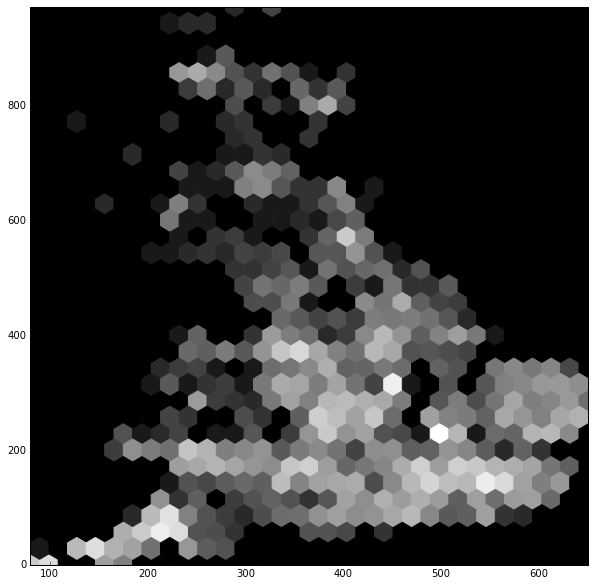

In [23]:
import numpy as np
import bng
import matplotlib.pyplot as plt
%matplotlib inline

coords = []
for o in obs:    
    try:
        coords.append(bng.grid_ref_str_to_easting_northing(o['location']))
    except IndexError:
        pass

coords = np.array(coords) #convert to numpy array

fig, ax = plt.subplots(figsize=(10, 10))
ax.hexbin(coords[:,0],coords[:,1],gridsize=30,cmap='gray',bins='log')